In [52]:
!pip install tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [53]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


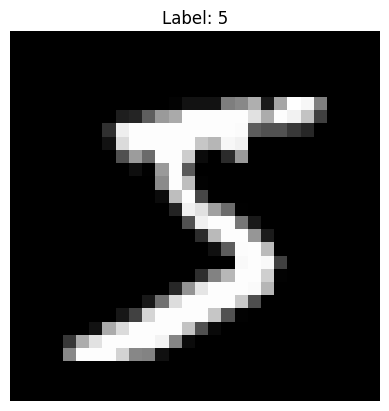

In [54]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

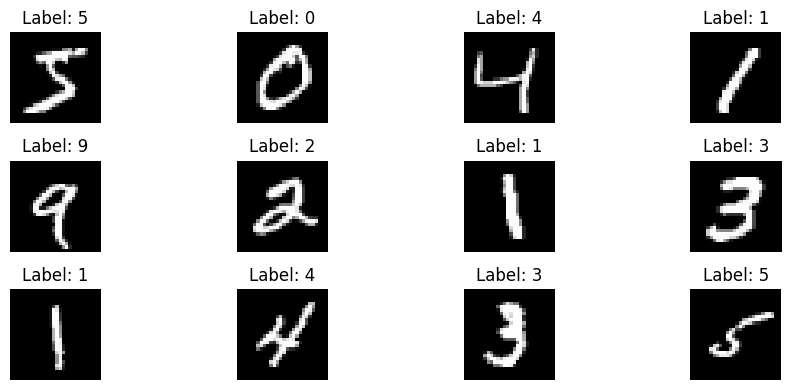

In [55]:
import matplotlib.pyplot as plt

num_images = 12
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


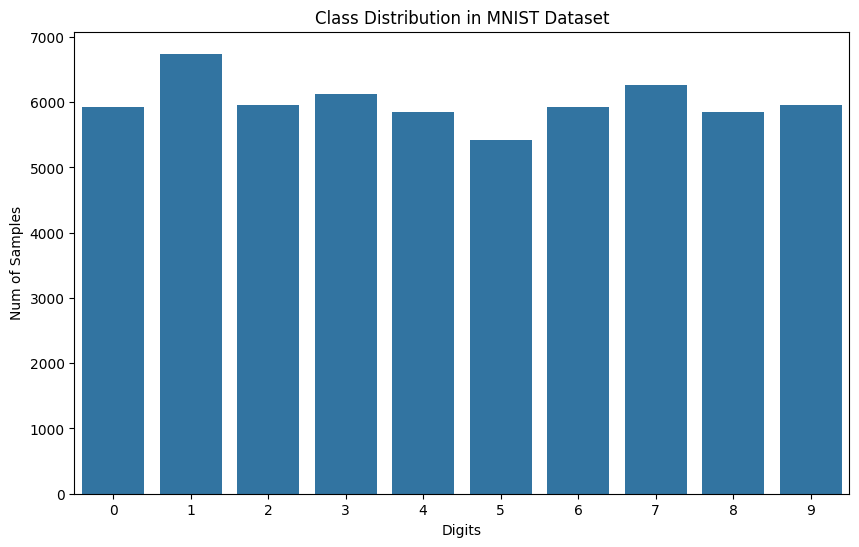

In [56]:
!pip install seaborn
!pip install numpy

import seaborn as sns
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution in MNIST Dataset")
plt.xlabel("Digits")
plt.ylabel("Num of Samples")
plt.xticks(rotation=0) # force them to be horizontal
plt.show()

In [57]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\alici\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

base_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#base_model.fit(x_train, y_train, epochs=5)
base_history = base_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9242 - loss: 0.2634 - val_accuracy: 0.9558 - val_loss: 0.1479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1163 - val_accuracy: 0.9695 - val_loss: 0.1009
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0802 - val_accuracy: 0.9742 - val_loss: 0.0835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9820 - loss: 0.0591 - val_accuracy: 0.9756 - val_loss: 0.0802
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9777 - val_loss: 0.0744


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


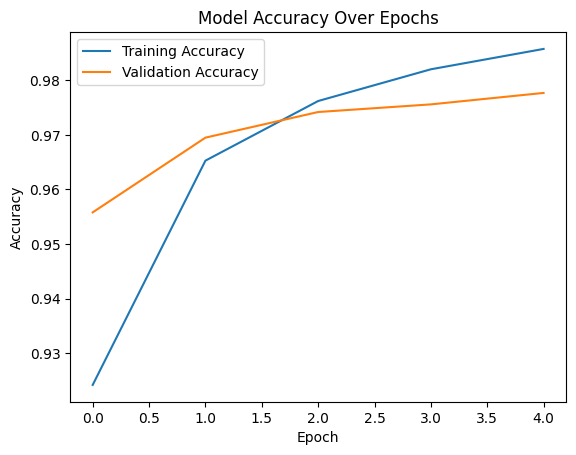

In [59]:
print(base_history.history.keys())

plt.plot(base_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in base_history.history:
    plt.plot(base_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [60]:
CNNmodel = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\alici\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:38: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNmodel.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#CNNmodel.fit(x_train, y_train, epochs=5)
CNN_history = CNNmodel.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7101 - loss: 1.2636 - val_accuracy: 0.8616 - val_loss: 0.5605
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8712 - loss: 0.4681 - val_accuracy: 0.8923 - val_loss: 0.3822
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8900 - loss: 0.3750 - val_accuracy: 0.9043 - val_loss: 0.3371
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8993 - loss: 0.3420 - val_accuracy: 0.9086 - val_loss: 0.3215
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9037 - loss: 0.3262 - val_accuracy: 0.9127 - val_loss: 0.3108


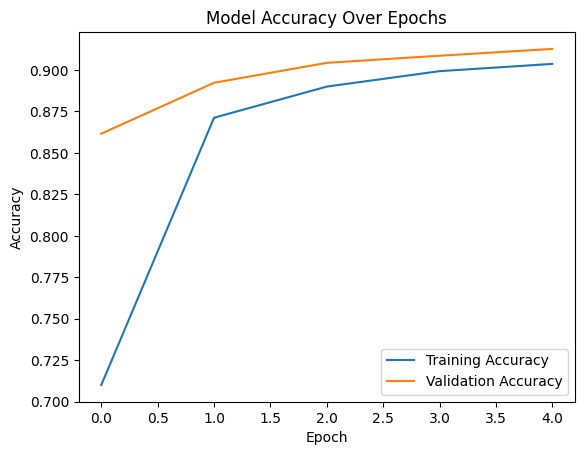

In [62]:
plt.plot(CNN_history.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history.history:
    plt.plot(CNN_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

what if we run them for longer does that help?

In [63]:
base_history_lt = base_model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5338 - loss: 1.9858 - val_accuracy: 0.7378 - val_loss: 1.4854
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7937 - loss: 1.0011 - val_accuracy: 0.8543 - val_loss: 0.6598
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8694 - loss: 0.5333 - val_accuracy: 0.8926 - val_loss: 0.4238
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8961 - loss: 0.3889 - val_accuracy: 0.9052 - val_loss: 0.3415
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9079 - loss: 0.3300 - val_accuracy: 0.9143 - val_loss: 0.3045
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9151 - loss: 0.2970 - val_accuracy: 0.9209 - val_loss: 0.2760
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9208 - loss: 0.2737 - val_accuracy: 0.9267 - val_loss: 0.2581
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9260 - loss: 0.2551 - 

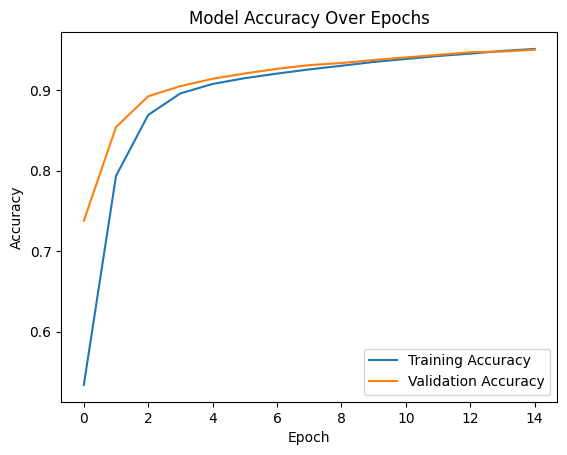

In [64]:
plt.plot(base_history_lt.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in base_history_lt.history:
    plt.plot(base_history_lt.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [65]:
CNN_history_lt = CNNmodel.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test) # for val accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9072 - loss: 0.3165 - val_accuracy: 0.9113 - val_loss: 0.3007
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9094 - loss: 0.3091 - val_accuracy: 0.9128 - val_loss: 0.2924
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9113 - loss: 0.3035 - val_accuracy: 0.9164 - val_loss: 0.2862
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9132 - loss: 0.2996 - val_accuracy: 0.9177 - val_loss: 0.2868
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9143 - loss: 0.2953 - val_accuracy: 0.9175 - val_loss: 0.2825
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9153 - loss: 0.2924 - val_accuracy: 0.9192 - val_loss: 0.2784
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9158 - loss: 0.2901 - val_accuracy: 0.9186 - val_loss: 0.2774
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9167 - loss: 0.2877 

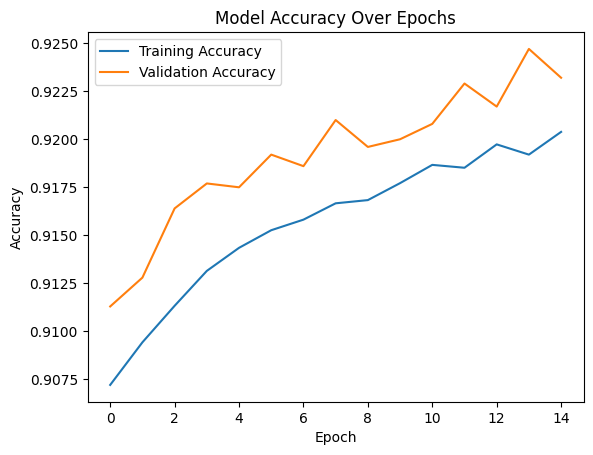

In [66]:
plt.plot(CNN_history_lt.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_lt.history:
    plt.plot(CNN_history_lt.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Extra visualizations on how the machine identifies the numbers

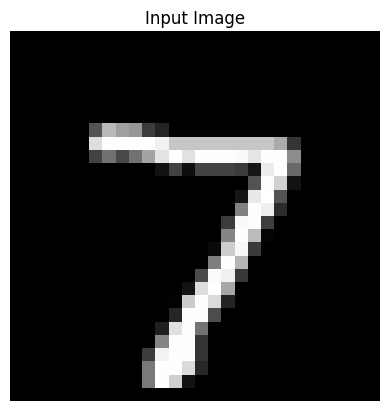

In [67]:
img = x_test[0] # first image from test set
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

In [68]:
pred = np.argmax(CNNmodel.predict(img[np.newaxis, ...]))
print(f"Predicted class: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: 7


In [69]:
for i, layer in enumerate(CNNmodel.layers):
    print(i, layer.name)

0 reshape_2
1 conv2d_1
2 max_pooling2d_1
3 flatten_4
4 dense_6


In [70]:
import tensorflow as tf

# i had problems showingcasing anything from my previous models due to some unknown errors, so i recreated the model here*
#CNNmodel = keras.Sequential([
#    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
#    keras.layers.Conv2D(32, (3, 3), activation="relu"),
#    keras.layers.MaxPooling2D((2, 2)),
#    keras.layers.Flatten(),
#    keras.layers.Dense(10, activation="softmax")
#])

inputs = tf.keras.Input(shape=(28, 28), name="input_layer")
x = tf.keras.layers.Reshape((28, 28, 1))(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="valid", name="conv1")(x) # valid padding to be the same as the original one
x = tf.keras.layers.MaxPooling2D((2, 2), name="pool1")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs)
functional_model.set_weights(CNNmodel.get_weights())


* *Apparently sequential models cannot do this line "activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)"
because the tensors are "skipped" when they are made in sequential models but when they are explicity made with tensors as i did now they work well

After some consideration i decided to not commit my tries because whatever I tried it simply didn't work so I just gave up with trying it

In [71]:
target_digit = 6
indices = np.where(y_train == target_digit)[0] # get the first digit for whatever digit i want
img = x_train[indices[0]]

layer_outputs = [functional_model.get_layer("conv1").output]
activation_model = tf.keras.Model(inputs=functional_model.input, outputs=layer_outputs)
activations = activation_model.predict(img[np.newaxis, ...], verbose=0)[0]

activity_per_filter = np.sum(activations, axis=(0, 1)) #activity is all the pixel values summed up

top_indices = np.argsort(activity_per_filter)[::-1][:10] # top 10 most used filters

print(f"10 most active filters: {top_indices}")
print(f"Activity values: {activity_per_filter[top_indices]}")

10 most active filters: [25 15 14 10 24 11  7 12  9  8]
Activity values: [52.047543 30.169128 21.974537 21.600016 20.655733 20.014124  0.
  0.        0.        0.      ]


Let's see visually 

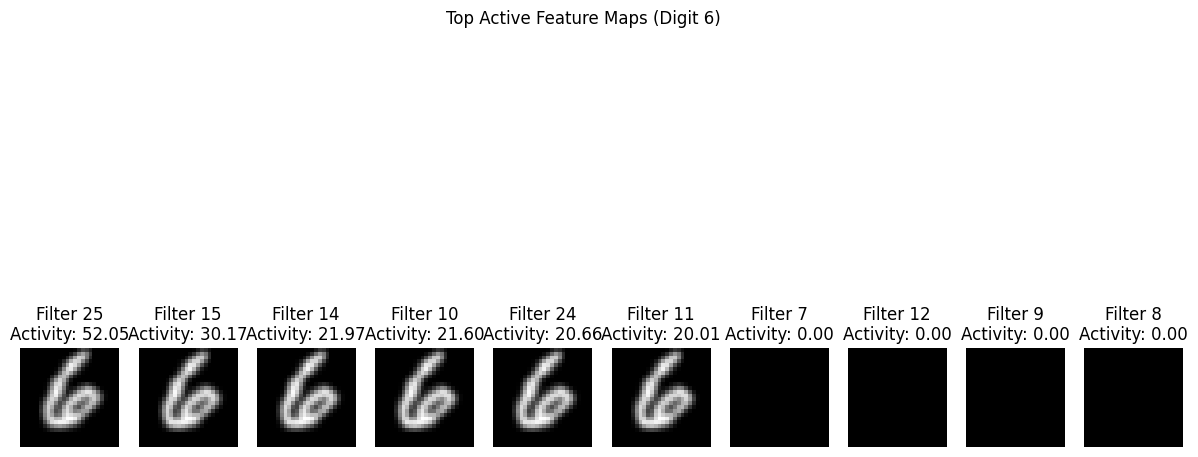

In [72]:
fig, axes = plt.subplots(1, 10, figsize=(15, 8))
for plot_idx, filter_idx in enumerate(top_indices):
    ax = axes[plot_idx]
    feature_map = activations[:, :, filter_idx]
    
    # only get those that are actually used + normalize them
    if feature_map.max() > 0:
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    
    ax.imshow(feature_map, cmap="gray")
    ax.set_title(f"Filter {filter_idx}\nActivity: {activity_per_filter[filter_idx]:.2f}")
    ax.axis("off")

plt.suptitle(f"Top Active Feature Maps (Digit {target_digit})")
plt.show()

Since all of them look the same lets see if the kernels that go through them are also the same or not

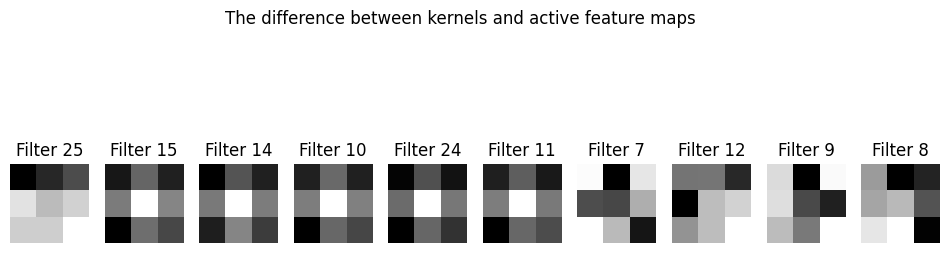

In [73]:
weights = CNNmodel.layers[1].get_weights()[0] # get all weights from the first Conv2D layer

fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, idx in enumerate(top_indices):
    ax = axes[i]
    # get the specific 3x3 kernel for this filter
    kernel = weights[:, :, 0, idx]
    kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    
    ax.imshow(kernel_norm, cmap="gray")
    ax.set_title(f"Filter {idx}")
    ax.axis("off")

plt.suptitle("The difference between kernels and active feature maps")
plt.show()

fashion MNIST with the same models

In [74]:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

You should consider upgrading via the 'C:\Users\alici\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [75]:
(fx_train, fy_train), (fx_test, fy_test) = keras.datasets.fashion_mnist.load_data()

print(fx_train.shape)  # (60000, 28, 28)
print(fy_train.shape)  # (60000,)

(60000, 28, 28)
(60000,)


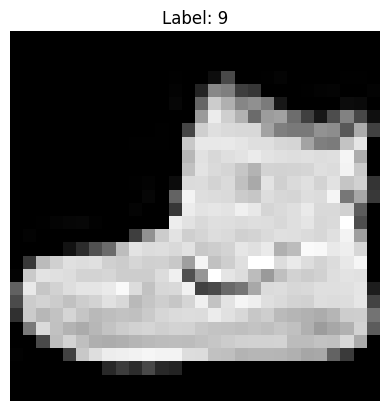

In [76]:
plt.imshow(fx_train[0], cmap="gray") # cmap="gray" to make it balck & white
plt.title(f"Label: {fy_train[0]}")
plt.axis("off")
plt.show()

In [77]:
base_history_f = base_model.fit(
    fx_train, fy_train,
    epochs=20,
    validation_data=(fx_test, fy_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6518 - loss: 11853.6338 - val_accuracy: 0.7337 - val_loss: 1524.0100
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7676 - loss: 902.6633 - val_accuracy: 0.7708 - val_loss: 681.3862
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7936 - loss: 431.2875 - val_accuracy: 0.7722 - val_loss: 387.5277
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8041 - loss: 255.1540 - val_accuracy: 0.8052 - val_loss: 243.6170
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8123 - loss: 166.1589 - val_accuracy: 0.8101 - val_loss: 175.6969
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8176 - loss: 116.0211 - val_accuracy: 0.8112 - val_loss: 134.7488
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8190 - loss: 89.0216 - val_accuracy: 0.8169 - val_loss: 113.7477
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accu

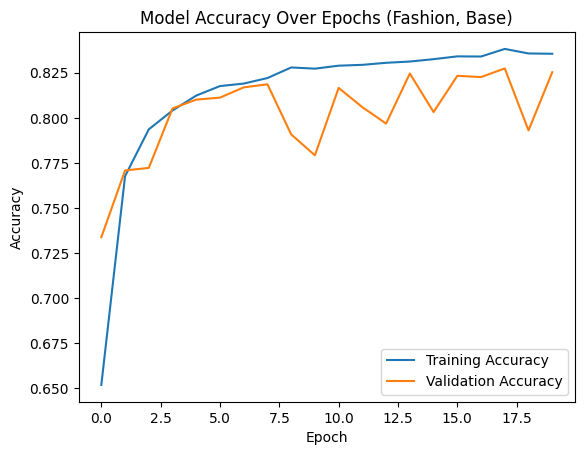

In [78]:
plt.plot(base_history_f.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in base_history_f.history:
    plt.plot(base_history_f.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs (Fashion, Base)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [79]:
CNN_history_f = CNNmodel.fit(
    fx_train, fy_train,
    epochs=20,
    validation_data=(fx_test, fy_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6105 - loss: 51534.7617 - val_accuracy: 0.7171 - val_loss: 19400.8242
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7473 - loss: 12944.8271 - val_accuracy: 0.7611 - val_loss: 9806.8799
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7781 - loss: 7248.6221 - val_accuracy: 0.7873 - val_loss: 5776.7734
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7928 - loss: 4754.1987 - val_accuracy: 0.7813 - val_loss: 4244.5146
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8008 - loss: 3319.2742 - val_accuracy: 0.7774 - val_loss: 3291.0254
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8053 - loss: 2464.5027 - val_accuracy: 0.7829 - val_loss: 2598.4185
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8113 - loss: 1916.1046 - val_accuracy: 0.8043 - val_loss: 1718.1667
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━

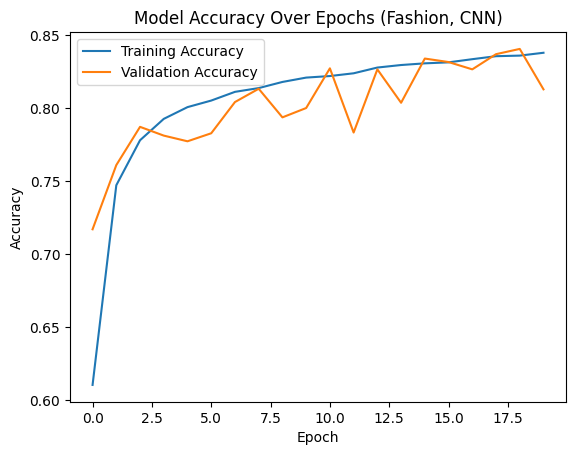

In [80]:
plt.plot(CNN_history_f.history["accuracy"], label="Training Accuracy")
if "val_accuracy" in CNN_history_f.history:
    plt.plot(CNN_history_f.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs (Fashion, CNN)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

pretty good basic scores, but fluctuates a lot which is expected due to varience

### Extra section for the live coding task
Should be 10 lines of code, will probably make some pretty graphs